Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 4 </h2>
    <h1> El puesto de DATiles de Viocente </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022<br>    
        Fecha de entrega: Viernes 10 de Junio a las 22:00hrs.
    </p>
    <br>
</center>

<br>

---

Luego de estar aprendiendo técnicas para trading de cryptomonedas y poder finalmente llegar a alcanzar la libertad financiera, descubres que PCA se inventó el 1901. Supones tienen que existir algoritmos mejores, por lo que consultas al gurú Viocente. Él te dice que para poder superar cualquier bot de trading, lo único que necesitas es ser un experto en clustering y reducción de dimensionalidad.

Por esto decides tomar el dataset de las frutas más _Data Mining_ que existen, [los Dátiles](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets), extraídos del baúl de Viocente, para probar finalmente cuál es el MEJOR algoritmo para reducir la dimensionalidad y para realizar unos lindos clusters. 

# Parte 1: Carga y preprocesamiento (0.5 puntos)
Cargue los datos y librerías, y realice preprocesamiento en caso de necesitarlo.


In [1]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 8.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7ca546eb8d95bcfac33933ae62600e4b93300797203155dc809e1e582c5ed521
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=33d3639cc50191c2563f6e19ea38908a3f079189092dd9924c9c25ebc4cfb7d6
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_excel("Date_Fruit_Datasets.xlsx")
dataset

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0      0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1      0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2      0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3      0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4      0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   
..        ...          ...     ...           ...  ...         ...         ...   
893    0.9785       261028  0.7269        1.4499  ...      2.2423      2.3704   
894    0.9466       386566  0.6695        1.5510  ...      3.4109      3.5805   
895    0.9925       256255  0.7240        1.7159  ...      2.2759      2.5090   
896    0.9604       248795  0.6954        1.6220  ...      2.6769      2.6874   
897    0.9781       351472  0.6941        1.5405  ...      2.5138      3.0369   

     KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  \
0        4.2287 -59191263232 -50714214400 -39922372608     58.7255   
1        3.1704 -34233065472 -37462601728 -31477794816     50.0259   
2        4.7192 -93948354560 -74738221056 -60311207936     65.4772   
3        8.2618 -32074307584 -32060925952 -29575010304     43.3900   
4        4.4146 -39980974080 -35980042240 -25593278464     52.7743   
..          ...          ...          ...          ...         ...   
893      2.7202 -25296416768 -19168882688 -18473392128     49.0869   
894      3.9910 -31605219328 -21945366528 -19277905920     46.8086   
895      2.6951 -22242772992 -19594921984 -17592152064     44.1325   
896      2.7991 -26048595968 -21299822592 -19809978368     51.2267   
897      3.0865 -31983476736 -20482514944 -21219354624     47.3454   

     ALLdaub4RG  ALLdaub4RB  Class  
0       54.9554     47.8400  BERHI  
1       52.8168     47.8315  BERHI  
2       59.2860     51.9378  BERHI  
3       44.1259     41.1882  BERHI  
4       50.9080     42.6666  BERHI  
..          ...         ...    ...  
893     43.0422     42.4153  SOGAY  
894     39.1046     36.5502  SOGAY  
895     40.7986     40.9769  SOGAY  
896     45.7162     45.6260  SOGAY  
897     38.6966     39.6738  SOGAY  

[898 rows x 35 columns]

In [4]:
dataset.describe()

AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   
min     50.298400    0.836600    2257.000000    0.512300      1.065300  ...   
25%    513.317075    0.978825  210022.750000    0.705875      1.373725  ...   
50%    638.140950    0.987300  327207.000000    0.746950      1.524150  ...   
75%    697.930525    0.991800  388804.000000    0.775850      1.674750  ...   
max    833.827900    0.997400  552598.000000    0.856200    535.525700  ...   

           SkewRB  KurtosisRR  KurtosisRG  KurtosisRB     EntropyRR  \
count  898.000000  898.000000  898.000000  898.000000  8.980000e+02   
mean     0.250518    4.247845    5.110894    3.780928 -3.185021e+10   
std      0.632918    2.892357    3.745463    2.049831  2.037241e+10   
min     -1.029100    1.708200    1.607600    1.767200 -1.091224e+11   
25%     -0.196950    2.536625    2.508850    2.577275 -4.429444e+10   
50%      0.135550    3.069800    3.127800    3.080700 -2.826156e+10   
75%      0.593950    4.449850    7.320400    4.283125 -1.460482e+10   
max      3.092300   26.171100   26.736700   32.249500 -1.627316e+08   

          EntropyRG     EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB  
count  8.980000e+02  8.980000e+02  898.000000  898.000000  898.000000  
mean  -2.901860e+10 -2.771876e+10   50.082888   48.805681   48.098393  
std    1.712952e+10  1.484137e+10   16.063125   14.125911   10.813862  
min   -9.261697e+10 -8.747177e+10   15.191100   20.524700   22.130000  
25%   -3.894638e+10 -3.564534e+10   38.224425   38.654525   39.250725  
50%   -2.620990e+10 -2.392928e+10   53.841300   50.337800   49.614100  
75%   -1.433105e+10 -1.660367e+10   63.063350   59.573600   56.666675  
max   -5.627727e+08 -4.370435e+08   79.828900   83.064900   74.104600  

[8 rows x 34 columns]

##### Separacion de datos

Ahora debemos separar entre los datos input y ouput. Donde todas las columnas menos "class" vendrian siendo los input(X). Luego la columna "Class" output(Y)

In [5]:
X = dataset.loc[:, dataset.columns != 'Class']
y = dataset['Class']
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

Verificamos si hay valores nulos

In [6]:
X.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
dtype: int64

Ahora normalizaremos los datos para lograr reducir las dimensionalidades de manera correcta. Esto se hara mediante la "puntuacion estandar":

$\frac{X-\mu}{\sigma}$

In [7]:
X = (X-X.mean())/X.std()

Ahora verificamos las estadisticas de los datos.

In [8]:
X.describe()

AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02   
mean   1.978126e-16 -6.157411e-15  5.341805e-15  3.545790e-15 -1.042528e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.762904e+00 -2.794630e+00 -2.874436e+00 -4.319544e+00 -4.425554e+00   
25%   -8.517603e-01 -8.086814e-01 -7.617927e-01 -7.980159e-01 -5.842933e-01   
50%    2.008276e-01  3.382446e-01  2.814910e-01 -7.157985e-03  1.942149e-01   
75%    7.858421e-01  8.098671e-01  7.484538e-01  8.152603e-01  7.289991e-01   
max    2.310292e+00  1.839788e+00  3.275810e+00  2.367930e+00  2.958863e+00   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02   
mean   2.834345e-15  3.223220e-14 -9.736087e-17 -2.238262e-14 -6.324593e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.634681e+00 -7.998952e+00 -2.771555e+00 -4.167204e+00 -5.980669e-02   
25%   -7.630897e-01 -1.660650e-01 -8.622182e-01 -5.654860e-01 -4.249965e-02   
50%    2.806415e-01  3.006864e-01  2.146879e-01  1.987685e-01 -3.405866e-02   
75%    7.805799e-01  5.485190e-01  7.807554e-01  7.364912e-01 -2.560785e-02   
max    1.916904e+00  8.569329e-01  2.285998e+00  2.231509e+00  2.993105e+01   

       ...        SkewRB    KurtosisRR    KurtosisRG    KurtosisRB  \
count  ...  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02   
mean   ... -3.293579e-16 -5.439846e-17 -1.617118e-15  4.860007e-16   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -2.021776e+00 -8.780538e-01 -9.353436e-01 -9.823873e-01   
25%    ... -7.069922e-01 -5.916352e-01 -6.947191e-01 -5.871962e-01   
50%    ... -1.816475e-01 -4.072959e-01 -5.294658e-01 -3.416028e-01   
75%    ...  5.426172e-01  6.984089e-02  5.899153e-01  2.449943e-01   
max    ...  4.489971e+00  7.579719e+00  5.773868e+00  1.388825e+01   

          EntropyRR     EntropyRG     EntropyRB    ALLdaub4RR    ALLdaub4RG  \
count  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02  8.980000e+02   
mean  -1.017556e-17  8.697571e-17 -1.064479e-16 -2.881016e-15 -4.878552e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.792983e+00 -3.712793e+00 -4.026110e+00 -2.172167e+00 -2.002064e+00   
25%   -6.108376e-01 -5.795711e-01 -5.340866e-01 -7.382413e-01 -7.186195e-01   
50%    1.761522e-01  1.639685e-01  2.553320e-01  2.339776e-01  1.084616e-01   
75%    8.465069e-01  8.574408e-01  7.489264e-01  8.080907e-01  7.622814e-01   
max    1.555411e+00  1.661215e+00  1.838220e+00  1.851820e+00  2.425275e+00   

         ALLdaub4RB  
count  8.980000e+02  
mean  -1.836442e-15  
std    1.000000e+00  
min   -2.401399e+00  
25%   -8.181783e-01  
50%    1.401633e-01  
75%    7.923425e-01  
max    2.404895e+00  

[8 rows x 34 columns]

In [9]:
X.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
dtype: int64

# Parte 2: Reducción de dimensionalidades (1 punto)

Para esta parte deben reducir la dimensionalidad de los datos utilizando los métodos de: PCA, t-SNE y UMAP. 
Para esto puede utilizar las librerías que estime conveniente. 

Reduzca los datos a dos dimensiones y grafiquelos para cada caso. 

Importante: Debe buscar los hiperparámetros que mejor separen los datos según los conocimientos que ya posee. (pruebe almenos 5)

In [10]:
# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fig = px.scatter(principalDf, x='principal component 1', y='principal component 2',
              color=y)
fig.show()

#### t-SNE

se calcularan los mejores hiperparametros entre:
- n_iter
- perplexity

In [11]:
# t-SNE
n_iter = [n for n in range(500, 4501, 2000)]
perplexityes = [n for n in range(1, 102, 25)]
prueba = 1
for i in n_iter:
    for perxpexity in perplexityes:
      print(f"\n--------------------------------------------\nTEST NUMBER {prueba} WITH:\n- {i} iteraciones  AND {'auto'} LEARNING RATE AND {perxpexity} PERPLEXITY\n")
      m=TSNE(learning_rate='auto', n_iter = i, init = 'random', perplexity = perxpexity, random_state=42,method="exact")
      tsne_features = m.fit_transform(X)
      principalDfTsne = pd.DataFrame(data = tsne_features
                  , columns = ['principal component 1', 'principal component 2'])
      fig = px.scatter(principalDfTsne, x='principal component 1', y='principal component 2',
                  color=y)
      fig.show()
      prueba +=1


--------------------------------------------
TEST NUMBER 1 WITH:
- 500 iteraciones  AND auto LEARNING RATE AND 1 PERPLEXITY




--------------------------------------------
TEST NUMBER 2 WITH:
- 500 iteraciones  AND auto LEARNING RATE AND 26 PERPLEXITY




--------------------------------------------
TEST NUMBER 3 WITH:
- 500 iteraciones  AND auto LEARNING RATE AND 51 PERPLEXITY




--------------------------------------------
TEST NUMBER 4 WITH:
- 500 iteraciones  AND auto LEARNING RATE AND 76 PERPLEXITY




--------------------------------------------
TEST NUMBER 5 WITH:
- 500 iteraciones  AND auto LEARNING RATE AND 101 PERPLEXITY




--------------------------------------------
TEST NUMBER 6 WITH:
- 2500 iteraciones  AND auto LEARNING RATE AND 1 PERPLEXITY




--------------------------------------------
TEST NUMBER 7 WITH:
- 2500 iteraciones  AND auto LEARNING RATE AND 26 PERPLEXITY




--------------------------------------------
TEST NUMBER 8 WITH:
- 2500 iteraciones  AND auto LEARNING RATE AND 51 PERPLEXITY




--------------------------------------------
TEST NUMBER 9 WITH:
- 2500 iteraciones  AND auto LEARNING RATE AND 76 PERPLEXITY




--------------------------------------------
TEST NUMBER 10 WITH:
- 2500 iteraciones  AND auto LEARNING RATE AND 101 PERPLEXITY




--------------------------------------------
TEST NUMBER 11 WITH:
- 4500 iteraciones  AND auto LEARNING RATE AND 1 PERPLEXITY




--------------------------------------------
TEST NUMBER 12 WITH:
- 4500 iteraciones  AND auto LEARNING RATE AND 26 PERPLEXITY




--------------------------------------------
TEST NUMBER 13 WITH:
- 4500 iteraciones  AND auto LEARNING RATE AND 51 PERPLEXITY




--------------------------------------------
TEST NUMBER 14 WITH:
- 4500 iteraciones  AND auto LEARNING RATE AND 76 PERPLEXITY




--------------------------------------------
TEST NUMBER 15 WITH:
- 4500 iteraciones  AND auto LEARNING RATE AND 101 PERPLEXITY



***Parametros elegidos***:

Luergo de visualizar todos estos diferentes casos, el que a mi criterio segmenta mejor los datos es:
- n_iter = 2500
- Perrplexity = 51

#### UMAP

se calcularan los mejores hiperparametros entre:
- metrics
- n_neighbors
- min_dist

In [12]:
# UMAP
import umap
n_neighbors = [2, 5, 10, 20, 50, 100, 200]
min_dists = [0.0, 0.1, 0.25]
metrics = ['euclidean', 'manhattan', 'chebyshev']
prueba= 0 
for min_dist in min_dists:
  for metric in metrics:
    for n_neigh in n_neighbors:
      print(f"\n--------------------------------------------\nTEST NUMBER {prueba} WITH:\n- {min_dist} min_dist  AND {metric} metric AND {n_neigh} NEIGHS\n")

      reducer =  umap.UMAP(
              n_neighbors=n_neigh,
              min_dist=min_dist,
              metric=metric
          )
      reducer.fit(X)
      embedding = reducer.transform(X)
      principalDfEmbedding = pd.DataFrame(data = embedding
                  , columns = ['principal component 1', 'principal component 2'])
      fig = px.scatter(principalDfEmbedding, x='principal component 1', y='principal component 2',
                    color=y)
      fig.show()
      prueba +=1


--------------------------------------------
TEST NUMBER 0 WITH:
- 0.0 min_dist  AND euclidean metric AND 2 NEIGHS



/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.




--------------------------------------------
TEST NUMBER 1 WITH:
- 0.0 min_dist  AND euclidean metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 2 WITH:
- 0.0 min_dist  AND euclidean metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 3 WITH:
- 0.0 min_dist  AND euclidean metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 4 WITH:
- 0.0 min_dist  AND euclidean metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 5 WITH:
- 0.0 min_dist  AND euclidean metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 6 WITH:
- 0.0 min_dist  AND euclidean metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 7 WITH:
- 0.0 min_dist  AND manhattan metric AND 2 NEIGHS



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.




--------------------------------------------
TEST NUMBER 8 WITH:
- 0.0 min_dist  AND manhattan metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 9 WITH:
- 0.0 min_dist  AND manhattan metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 10 WITH:
- 0.0 min_dist  AND manhattan metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 11 WITH:
- 0.0 min_dist  AND manhattan metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 12 WITH:
- 0.0 min_dist  AND manhattan metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 13 WITH:
- 0.0 min_dist  AND manhattan metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 14 WITH:
- 0.0 min_dist  AND chebyshev metric AND 2 NEIGHS




--------------------------------------------
TEST NUMBER 15 WITH:
- 0.0 min_dist  AND chebyshev metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 16 WITH:
- 0.0 min_dist  AND chebyshev metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 17 WITH:
- 0.0 min_dist  AND chebyshev metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 18 WITH:
- 0.0 min_dist  AND chebyshev metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 19 WITH:
- 0.0 min_dist  AND chebyshev metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 20 WITH:
- 0.0 min_dist  AND chebyshev metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 21 WITH:
- 0.1 min_dist  AND euclidean metric AND 2 NEIGHS




--------------------------------------------
TEST NUMBER 22 WITH:
- 0.1 min_dist  AND euclidean metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 23 WITH:
- 0.1 min_dist  AND euclidean metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 24 WITH:
- 0.1 min_dist  AND euclidean metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 25 WITH:
- 0.1 min_dist  AND euclidean metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 26 WITH:
- 0.1 min_dist  AND euclidean metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 27 WITH:
- 0.1 min_dist  AND euclidean metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 28 WITH:
- 0.1 min_dist  AND manhattan metric AND 2 NEIGHS



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.




--------------------------------------------
TEST NUMBER 29 WITH:
- 0.1 min_dist  AND manhattan metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 30 WITH:
- 0.1 min_dist  AND manhattan metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 31 WITH:
- 0.1 min_dist  AND manhattan metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 32 WITH:
- 0.1 min_dist  AND manhattan metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 33 WITH:
- 0.1 min_dist  AND manhattan metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 34 WITH:
- 0.1 min_dist  AND manhattan metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 35 WITH:
- 0.1 min_dist  AND chebyshev metric AND 2 NEIGHS




--------------------------------------------
TEST NUMBER 36 WITH:
- 0.1 min_dist  AND chebyshev metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 37 WITH:
- 0.1 min_dist  AND chebyshev metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 38 WITH:
- 0.1 min_dist  AND chebyshev metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 39 WITH:
- 0.1 min_dist  AND chebyshev metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 40 WITH:
- 0.1 min_dist  AND chebyshev metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 41 WITH:
- 0.1 min_dist  AND chebyshev metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 42 WITH:
- 0.25 min_dist  AND euclidean metric AND 2 NEIGHS




--------------------------------------------
TEST NUMBER 43 WITH:
- 0.25 min_dist  AND euclidean metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 44 WITH:
- 0.25 min_dist  AND euclidean metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 45 WITH:
- 0.25 min_dist  AND euclidean metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 46 WITH:
- 0.25 min_dist  AND euclidean metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 47 WITH:
- 0.25 min_dist  AND euclidean metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 48 WITH:
- 0.25 min_dist  AND euclidean metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 49 WITH:
- 0.25 min_dist  AND manhattan metric AND 2 NEIGHS



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.




--------------------------------------------
TEST NUMBER 50 WITH:
- 0.25 min_dist  AND manhattan metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 51 WITH:
- 0.25 min_dist  AND manhattan metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 52 WITH:
- 0.25 min_dist  AND manhattan metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 53 WITH:
- 0.25 min_dist  AND manhattan metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 54 WITH:
- 0.25 min_dist  AND manhattan metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 55 WITH:
- 0.25 min_dist  AND manhattan metric AND 200 NEIGHS




--------------------------------------------
TEST NUMBER 56 WITH:
- 0.25 min_dist  AND chebyshev metric AND 2 NEIGHS




--------------------------------------------
TEST NUMBER 57 WITH:
- 0.25 min_dist  AND chebyshev metric AND 5 NEIGHS




--------------------------------------------
TEST NUMBER 58 WITH:
- 0.25 min_dist  AND chebyshev metric AND 10 NEIGHS




--------------------------------------------
TEST NUMBER 59 WITH:
- 0.25 min_dist  AND chebyshev metric AND 20 NEIGHS




--------------------------------------------
TEST NUMBER 60 WITH:
- 0.25 min_dist  AND chebyshev metric AND 50 NEIGHS




--------------------------------------------
TEST NUMBER 61 WITH:
- 0.25 min_dist  AND chebyshev metric AND 100 NEIGHS




--------------------------------------------
TEST NUMBER 62 WITH:
- 0.25 min_dist  AND chebyshev metric AND 200 NEIGHS



##### Parametros elegidos:
Luergo de visualizar todos estos diferentes casos, el que a mi criterio segmenta mejor los datos es:
- min_dist = 0.25
- metric = manhattan 
- neighs = 200

# Parte 3: Preguntas Reducción de dimensionalidad (1.8 Puntos)

### Pregunta 3.0 (0.2 puntos): Al momento de utilizar UMAP y t-SNE existe una gran diferencia si conocemos cuantos grupos de datos existen. Explique por qué, como minador de datos experto, es ESCENCIAL entender la diferencia entre PCA y algoritmos como t-SNE y UMAP.
 
La mayor diferencia entre PCA y algoritmos como t-SNE y UMAP, es el hecho de que PCA tiene una única forma de actuar si queremos llegar a una cantidad k de dimensiones.
 
Por lo que aunque sepamos la cantidad de grupos de datos existentes, no podemos hacer mucho. En contraste con esto t-SNE y UMAP, al ser algoritmos que varían según sus parámetros, podemos ir comparando como el algoritmo segmenta los datos y así saber cual es una mejor aproximación a los grupos que queremos segmentar.



## Preguntas sobre t-SNE (1 punto):
Para responder las preguntas recomendamos apoyarte utilizando este [paper de t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).
 
### Pregunta 3.1: ¿Es correcto decir que t-SNE mide distancias entre datos? Justifique su respuesta y
explique el proceso.
  
Si, esto es correcto, debido a que t-SNE se encarga de medir la distancia de los datos, o de manera más correcta se encarga de medir la probabilidad de que dos datos iniciales sean vecinos en base a sus distancias.  Esto se realiza tanto en la variable P, y luego en los datos mapeados en Q. Se genera la probabilidad de que dos datos en base a sus distancias en una distribución Gaussiana vayan a ser vecinos, en la variable P. Luego se mapean los datos y se calcula la misma probabilidad solo que ahora bajo una distribución t-Student.
 
Por lo que es correcto decir que en este algoritmo se miden distancias, en los datos antes y después de la reducción de dimensionalidad

 
### Pregunta 3.2: En su descripción teórica se describen dos variables de probabilidad distintas *p* y *q*. ¿Cuál es el objetivo de su definición? ¿Qué tanto afecta su relación al proceso de reducción de dimensionalidad?
 
Las variables de probabilidad P y Q se crean con un fin en común, pero para esto es mejor explicar cada una y cómo se relacionan.
- P viene a ser dada como la probabilidad condicionada de que un dato llegue a ser vecino de otro bajo una distribución Gaussiana, bajo la relación de la distancia del espacio inicial de dimensiones.
- Q por otro lado viene a ser también la probabilidad condicional, solo que de que los puntos luego de la reducción de dimensionalidades lleguen a ser vecinos. Además de que la distribución a la que se llevan estos puntos, es a una distribución t-student.
 
La relación que tienen estas dos variables, es que el algoritmo en cada iteración intenta, mediante el cálculo de la divergencia de Kullback-Leibler, en base a un error ir mejorando la diferencia entre estas proporciones para finalmente llegar a que la razón de P y Q sean lo mas parecidas posibles.
 
 
 
### Pregunta 3.3: ¿Qué ventajas tiene t-SNE por sobre SNE? Mencione almenos dos
 
- Previene “the crowding problem", que se genera debido a que SNE usa una distribución Gaussiana. Donde esto genera dos principales ventajas sobre SNE.
 
- Resuelve el problema de las colas, que se genera debido a que en una distribución Gaussiana, el área donde van a caer la mayor parte de los datos es más acotada de la que podrían llegar los datos. Por lo que muchas veces valores extremos que generarian varios grupos, generan uno. Donde esto se soluciona con la distribución t-student, ya que genera colas más "pesadas y un mayor área de llegada de los datos.
 
 
 
- t-SNE, al usar una distribución t-Student en vez de una Gaussiana. Nos permite arreglar la disimilaridad, para que estas sean simétricas, generando que las probabilidades de un punto i con otro j, sean idénticas


## Pregunta UMAP (0.6 puntos):
 
### Pregunta 3.4: UMAP tiene 2 diferencias importantes con t-SNE, explique estas diferencias y mencione que implican al momento de ejecutar el algoritmo.
 
Les recomendamos ver el siguiente [video](https://www.youtube.com/watch?v=eN0wFzBA4Sc)
- Planteamiento inicial del mapeo a menores dimensiones:
- t-SNE: Plantea en su primera iteración, todos los datos mapeados de manera aleatoria y iteración a iteración los va "mejorando" hasta llegar a la misma "distancia" de los datos iniciales.
-UMAP: Siempre empieza con el mismo mapeo inicial de los datos a una menor dimensión.
 
- "Mejoramiento" de los puntos a la cantidad de dimensiones que se quiere reducir:
- t-SNE: Por cada iteración, este algoritmo "mejora" todos los puntos un poco.
- UMAP: Mueve una cantidad reducida de puntos en cada iteración.
 
Esta diferencia hace que UMAP presente una mejor escalabilidad en datasets grandes y mayores dimensiones. De hecho UMAP escala linealmente lo cual lo hace muy útil para datasets con muchas dimensiones o cantidades de datos grandes.


# Parte 4: Clustering (2 puntos)

En esta parte construirás clusters usando algoritmos conocidos y compararás precisiones:

1. Para cada pregunta, prueba reduciendo a 2 y 5 dimensiones para cada tipo de reducción de la Parte 2. (Utilzen los hiperparametros que seleccionaron como los mejores en el pu)

1. Deberás obtener el puntaje [Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) de los clusters generados.

1. Obtén la cohesión de cada cluster (SSW) y la medida inter-cluster (SSB)

1. Visualiza la clasificación del caso de 2 dimensiones




los hiperparametros que seleccionamos en la parte 2 fueron:

 - PCA

 - t-SNE: 
   - n_iter = 2500 
   - perplexity = 51
   - LR = "auto"
 - UMAP:
   - n_neiighbors = 200
   - min_dist = 0.25
   - metric = "manhattan"


  Ahora lo que haremos sera tener nuestra lista de listas ***data*** que tendra el dataset, metodo y cantidad de componentes correspondientes a la reduccion de dimensionalidad.

In [13]:
components = [2,5]
data = []
columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5']

for component in components: 
  pca = PCA(n_components=component)
  principalComponents = pca.fit_transform(X)
  principalDf = pd.DataFrame(data = principalComponents  , columns = columns[:component])

  m=TSNE(learning_rate="auto", n_iter = 2500, perplexity = 51, init = 'random', n_components = component, random_state=42, method='exact')
  tsne_features = m.fit_transform(X)
  principalDfTsne = pd.DataFrame(data = tsne_features  , columns = columns[:component])
  

  reducer =  umap.UMAP(n_neighbors=200, min_dist=0.25, metric= "manhattan", n_components = component )
  reducer.fit(X)
  embedding = reducer.transform(X)
  principalDfEmbedding = pd.DataFrame(data = embedding , columns = columns[:component])
  
    
  data.append([principalDf,component,"PCA"])
  data.append([principalDfTsne,component,"TSNE"])
  data.append([principalDfEmbedding,component,"UMAP"])
  
  if component ==2:
    principalDfEmbedding2 = principalDfEmbedding
    principalDfTsne2 = principalDfTsne
    principalDf2 = principalDf
    fig = px.scatter(principalDf, x='principal component 1', y='principal component 2',
                  color=y, title= f"PCA WITH: \n- {component} components \n")
    fig.show()

    fig = px.scatter(principalDfTsne, x='principal component 1', y='principal component 2',
                  color=y,title = "t-SNE WITH:\n- 1500 iteraciones  AND 600 LEARNING RATE AND 61 PERPLEXITY")
    fig.show()
  

    fig = px.scatter(principalDfEmbedding, x='principal component 1', y='principal component 2',
                  color=y,title = "UMAP WITH:\n- 0.25 min_dist  AND manhattan metric")
    fig.show()

  
  

## Parte 4.1: K-means (1 punto)
Utilice k-means para obtener clusters utilizando las reducciones de dimensionalidad vistas anteriormente.


**SSW Y SSB**

In [14]:
def within_sum_of_squares(data, centroids, labels):  

    centroid = data.mean(axis=0)   
    dif = data- centroid
    SST = (dif**2).sum()
    SSW = 0
    for l in np.unique(labels):
        data_l = data[labels == l]
        resid = data_l - centroids[l]
        SSW += (resid**2).sum()
    SSB = SST - SSW
    print("SSW:",SSW)
    print("SSB:",SSB)
    return SSW, SSB
  ##reference from https://towardsdatascience.com/how-to-determine-the-right-number-of-clusters-with-code-d58de36368b1

In [15]:
k=7
for df in data:
  kmeans = KMeans(n_clusters=k, random_state = 42)
  y_pred = kmeans.fit_predict(df[0])
  kmeans
  if df[1] == 2:
    fig = px.scatter(df[0], x='principal component 1', y='principal component 2', #PASO 4 VISUALIZACION para clasificacion de dos dimensiones
                  color=y_pred, title= f"{df[1]}- {df[2]}")
    fig.show()
  else:
    print( f"{df[1]}- {df[2]}")
  print("RAND INDEX:", rand_score(y, y_pred)) # paso 2 calculo del RAND_INDEX
  SSW, SSB = within_sum_of_squares(np.array(df[0]), kmeans.cluster_centers_, y_pred)#PASO 3 CALCULO DEL SSW Y SSB

  print("\n\n------------------------------------------")


RAND INDEX: 0.9067790928931628
SSW: 2130.1659449466924
SSB: 17365.93411198461


------------------------------------------


RAND INDEX: 0.9141831345762788
SSW: 24196.79150390625
SSB: 628391.7084960938


------------------------------------------


RAND INDEX: 0.9264089901254615
SSW: 668.9331970214844
SSB: 13456.351959228516


------------------------------------------
5- PCA
RAND INDEX: 0.907655560604142
SSW: 4948.85391929608
SSB: 21436.418466208263


------------------------------------------
5- TSNE
RAND INDEX: 0.9122067371316911
SSW: 3098.659698486328
SSB: 17282.105926513672


------------------------------------------
5- UMAP
RAND INDEX: 0.9250309743192477
SSW: 610.7640800476074
SSB: 13385.535724639893


------------------------------------------


## Parte 4.2: DBSCAN (1 punto)

Utilice DBSCAN para cada uno de los datos a los que se les aplicó reducción de dimensiones.

#### Searching the optimal HIPERPARAMETERES
1. Minmun Samples:
 - igual al doble de la dimension que estamos tratando
2. Epsilon:

 - Para esto usaremos la tecnica descrita en el siguiente [paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf). Donde basicamente lo que hace es calcular la distancia de los NearestNeighbors en orden y cuando hay una distancia, donde empieza a aumentar significativamente, es donde sera el valor optimo del Epsilon.

2 PCA


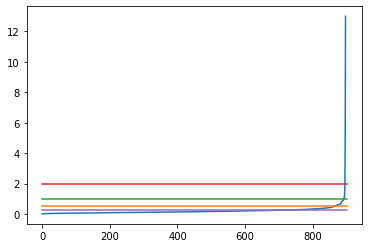

2 TSNE


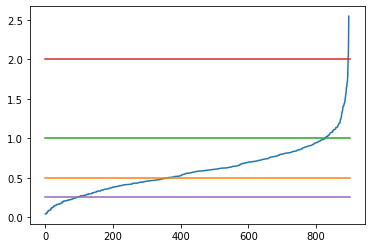

2 UMAP


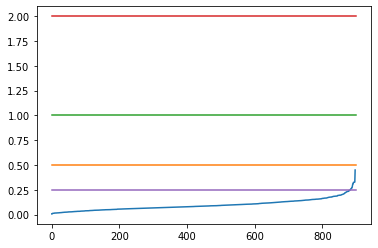

5 PCA


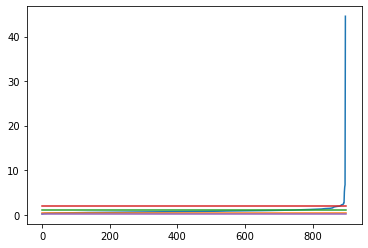

5 TSNE


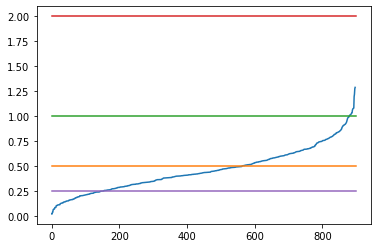

5 UMAP


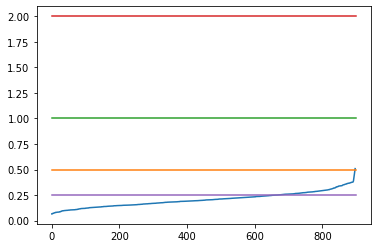

In [16]:

for df in data:
  nn_model = NearestNeighbors(n_neighbors=7)
  nn_model.fit(df[0])
  distances, indices = nn_model.kneighbors(df[0])
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  print(df[1],df[2])
  plt.plot(distances)
  x1 = [0,900]
  y1 = [0.5,0.5]
  x2 = [0,900]
  y2 = [1,1]
  x3 = [0,900]
  y3= [2,2]
  x4 = [0,900]
  y4= [0.25,0.25]
  plt.plot(x1,y1)
  plt.plot(x2,y2)
  plt.plot(x3,y3)
  plt.plot(x4,y4)
  plt.show()

Ahora con los graficos realizados, y trazando cuatro lineas para tener referencias. Por lo que aproximando visualmente tendremos que los eps por cada uno seran:
- 2 pca: 0.5
- 2 tsne: 1.2
- 2 umap: 0.28
- 5 pca: 2
- 5 tsne : 1
- 5 umap : 0.35

#### SSW Y SSB

Con esto, ahora debemos tener la funcion para calcular el SSW Y SSB:

In [17]:
def within_sum_of_squares_dbscan(data, labels):
    data1 = data[labels != -1]    # quitamos los "clusters" que se formarian por los outliers
    SSW = 0
    if len(data1):
      centroid = data1.mean(axis=0)   
      dif = data1- centroid
      SST = (dif**2).sum()
      for l in np.unique(labels):
        if l != -1:             #no consideramos los del "cluster" de outliers  
          data_l = data[labels == l]
          centroid = data_l.mean(axis=0)
          resid = data_l - centroid
          SSW += (resid**2).sum()
    else:
      SST = 0

    SSB = SST - SSW
    print("SSW:",SSW)
    print("SSB:",SSB)
    return SSW, SSB
    ##reference from https://towardsdatascience.com/how-to-determine-the-right-number-of-clusters-with-code-d58de36368b1

In [18]:
eps = [0.5,1.2,0.28,2,1,0.35]
for count, df in enumerate(data):
  y_predict = DBSCAN(eps = eps[count], min_samples=df[1]*2).fit_predict(df[0])


  if df[1] == 2:
    fig = px.scatter(df[0], x='principal component 1', y='principal component 2',     #PASO 4 VISUALIZACION DE LA CLASIFICACION PARA 2 DIMENSIONS
                  color=y_predict, title= f"{df[1]}- {df[2]}")
    fig.show()
  else:
    print( f"{df[1]}- {df[2]}")


  print("CANTIDAD DE CLUSTERS:", len(np.unique(y_predict))-1)

  prueba = np.array(y)[y_predict != -1]
  y_decision = np.array(y_predict)[y_predict != -1] #ignoramos los datos ruidosos para el calculo

  print("RAND INDEX:", rand_score(prueba, y_decision))      # paso 2 calculo del RAND_INDEX
  SSW, SSB = within_sum_of_squares_dbscan(np.array(df[0]), y_predict)     #PASO 3 CALCULO DEL SSW Y SSB

  print("\n\n------------------------------------------\n")


CANTIDAD DE CLUSTERS: 9
RAND INDEX: 0.5594353125865731
SSW: 7887.548798680141
SSB: 9076.512818272833


------------------------------------------



CANTIDAD DE CLUSTERS: 31
RAND INDEX: 0.8992460969061954
SSW: 11526.98220360279
SSB: 574758.6427963972


------------------------------------------



CANTIDAD DE CLUSTERS: 4
RAND INDEX: 0.8626530467810045
SSW: 1534.3685760498047
SSB: 12421.835525512695


------------------------------------------

5- PCA
CANTIDAD DE CLUSTERS: 1
RAND INDEX: 0.17042058698659215
SSW: 21359.31974396979
SSB: 0.0


------------------------------------------

5- TSNE
CANTIDAD DE CLUSTERS: 21
RAND INDEX: 0.8757159741794709
SSW: 1151.541924238205
SSB: 14422.096747636795


------------------------------------------

5- UMAP
CANTIDAD DE CLUSTERS: 16
RAND INDEX: 0.8594658802326534
SSW: 33.462770223617554
SSB: 5187.487425088882


------------------------------------------



# Parte 5: Visualización (0.2 puntos)
Visualize el top 3 de clasificaciones en 2 dimensiones. Argumente en que se basó para definir que eran los mejores. 






Las mejores 3 clasificaciones en 2 dimensiones fueron:
 
1. KMEANS con UMAP
2. KMEANS con t-SNE
3. KMEANS con PCA
 
Para esto nos basamos en el rand_index junto con la visualización de los datos una vez hecha la reducción de dimensionalidad y luego la predicción con los clusters que establece el algoritmo. No consideramos ninguna clasificación con DBSCAN por dos motivos:
- Ignora una cantidad significativa de datos detectando los como "ruido". Genera muchas veces clusters o grupos muy pequeños y otros muy grandes. Lo que termina también implicando que los clusters generados no se acercan a los que se esperaban(analizado de manera visual).
- Otra razón es por las propiedades de DBSCAN, no se adapta de manera óptima a nuestros dataset, por lo que funciona de manera irregular al probar con distintos valores.(esto será más explicado en la siguiente pregunta)

In [19]:
### 1 KMEANS CON UMAP:

kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(principalDfEmbedding2)
kmeans
print("\n\n------------------------------------------\n")
print("RAND INDEX:", rand_score(y, y_pred)) # paso 2 calculo del RAND_INDEX
fig = px.scatter(principalDfEmbedding2, x='principal component 1', y='principal component 2', #PASO 4 VISUALIZACION para clasificacion de dos dimensiones
                color=y_pred, title= f"{df[1]}- {df[2]}")
fig.show()



------------------------------------------

RAND INDEX: 0.9264089901254615


In [20]:
### 2 KMEANS CON t-sNE:

kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(principalDfTsne2)
kmeans
print("\n\n------------------------------------------\n")
print("RAND INDEX:", rand_score(y, y_pred)) # paso 2 calculo del RAND_INDEX
fig = px.scatter(principalDfTsne2, x='principal component 1', y='principal component 2', #PASO 4 VISUALIZACION para clasificacion de dos dimensiones
                color=y_pred, title= f"KMEANS CON t-sNE")
fig.show()



------------------------------------------

RAND INDEX: 0.9141831345762788


In [21]:
### 3 KMEANS CON UMAP:
kmeans = KMeans(n_clusters=k, random_state = 42)
y_pred = kmeans.fit_predict(principalDf2)

print("\n\n------------------------------------------\n")
print("RAND INDEX:", rand_score(y, y_pred))      # paso 2 calculo del RAND_INDEX

fig = px.scatter(principalDf2, x='principal component 1', y='principal component 2',
              color=y_pred, title= f"DBSCAN CON UMAP 2 DIMENSIONES")
fig.show()



------------------------------------------

RAND INDEX: 0.9067790928931628


# Parte 6: Preguntas Clustering: (0.5 puntos)

### Pregunta 6.1:

¿Cuál es la mejor combinación para este dataset? ¿Por qué podría haberse dado esto?

Para este caso, la mejor combinacion es el uso de UMAP con el algoritmo de KMeans. Esto se explica facilmente, primero debido a que UMAP a diferencia de PCA, es modificable y como en este caso sabemos la cantidad de clusters y a cuales corresponderian, podemos modificar los parametros de UMAp, para que la segmentacion del data set quede de manera mas optima. por otro lado frente a 

### Pregunta 6.2:

Mencione tres diferencias entre K-means y DBSCAN.

 
1. K Means se basa en agrupación por una **cantidad de clusters previamente definido**, mientras que DBSCAN, se basa en los hiperparametros **Epsilon y Min_smaples**. Donde estos son la distancia máxima que pueden tener dos puntos para poder pertenecer a un grupo y la cantidad mínima de datos para ser considerados como un grupo.
2. **KMeans a diferencia de DBSCAN si es sensible a los outliers**. Esto se debe a que este algoritmo considera todos los datos para generar la cantidad definida de segmentaciones previamente dichas. Mientras que DBSCAN, los detecta y los ignora, donde al momento de devolver los grupos que generó, retorna "-1" para los datos que se consideran como ruido y no son incluidos en ningún grupo. Esto genera que KMeans no funcione tan bien para datasets con una cantidad importante de outliers, ya que los terminará considerando al momento de generar clusters, mientras que DBSCAN solamente los ignorará al momento de detectarlos.
 
3. K Means al momento de juntar grupos se basa en **centroides**, mientras que DBSCAN se basa en **densidades de grupos**. Esto hace una gran diferencia al momento de hacer segmentaciones, ya que el primero va generando centroides y incluyendolos de a pocos, mientras que el segundo intenta generar grupos por densidades, viéndose altamente influido por sus hiperparametros y en datasets como el del caso visto, tendrá el problema de que hay grupos que no se pueden separar y cuesta generar la segmentación que queremos. Esto por que según se pueden ver se generan 3 "bolas" de densidades grandes y hay que tener cuidado con los hiperparametros.



# Bonus
Esta tarea cuenta con un bonus al que podrás optar. Cabe recalcar que para optar a este beneficio la nota de tu tarea (sin bonus) debe ser igual o superior a 3,95 (sin considerar posibles descuentos).

## Meme (hasta 2 décimas)

Haga un meme relacionado a la material del curso. Se dará el bonus a los **10 mejores** memes de la sección. (evaluado por el consejo de ayudantes).

Referencias
- [DBSCAN parameters](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)
- [SSW-SSB concept](https://towardsdatascience.com/explain-ml-in-a-simple-way-k-means-clustering-e925d019743b)
- [SSW-SSB code](https://towardsdatascience.com/how-to-determine-the-right-number-of-clusters-with-code-d58de36368b1)
- [KMEANS vs DBSCAN 1 ](https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/)
- [KMEANS vs DBSCAN 2 ](https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27)

- [t-SNE vs UMAP](https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17)
